In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

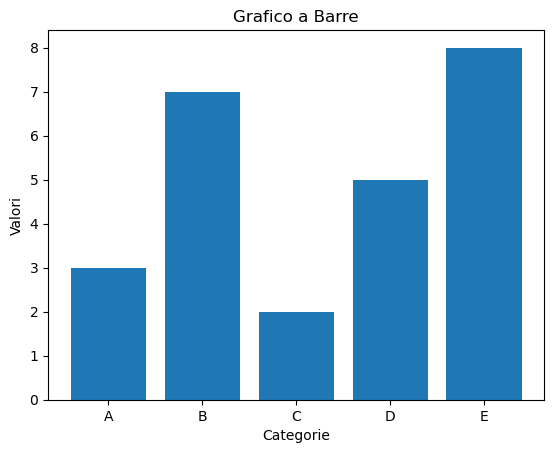

In [ ]:
### esempio grafico a barre
import matplotlib.pyplot as plt


categories = ['A', 'B', 'C', 'D', 'E']

values = [3, 7, 2, 5, 8]


plt.figure()

plt.bar(categories, values)

plt.title('Grafico a Barre')

plt.xlabel('Categorie')

plt.ylabel('Valori')

plt.show()

**Import dataset**

In [13]:
df = pd.read_csv("california_housing_data.csv")

In [20]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


AveRooms e AveBedrooms hanno chiaramente alcuni outliers. Possiamo stabilire che una casa non possa avere più di 20 stanze 

In [38]:
df = df[(df["AveRooms"] > 0) & (df["AveRooms"] <= 20)]       #almeno una stanza e massimo 20 stanze
df = df[(df["AveBedrms"] >= 0) & (df["AveBedrms"] <= 10)]    #almeno zero camere da letto e massimo 10 camere da letto

df = df[(df["AveOccup"] >= 0) & (df["AveOccup"] <= 10)]   #almeno zero inquilini e massimo 10 inquilini
df = df[(df["Population"] >= 0) & (df["Population"] <= (df["Population"].mean() + 5*df["Population"].std()))]      #almeno zero abitanti e massimo media + 5*deviazione standard

In [37]:
tot_nan = df.isna().sum().sum()
print("TOT val mancanti:", tot_nan)
if tot_nan > 0:
    print("Valori mancanti per colonna:")
    print(df[df.isna().any(axis=1)])

tot_dup = df.duplicated().sum()
print("Valori duplicati:", tot_nan)
if tot_dup > 0:
    print("Valori duplicati per colonna:")
    print(df[df.duplicated()])




TOT val mancanti: 0
Valori duplicati: 0


In [25]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20568.000000,20568.000000,20568.000000,20568.000000,20568.000000,20568.000000,20568.000000,20568.000000,20568.000000
mean,3.871665,28.676682,5.332862,1.076889,1429.414722,3.072572,35.624585,-119.569959,2.069868
std,1.899343,12.580658,1.412695,0.190146,1132.342817,10.403821,2.132953,2.004962,1.154544
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.750000,32.540000,-124.350000,0.149990
25%,2.564300,18.000000,4.437950,1.005882,791.000000,2.431714,33.930000,-121.800000,1.197750
50%,3.535700,29.000000,5.224737,1.048420,1168.000000,2.821194,34.250000,-118.490000,1.799000
75%,4.744700,37.000000,6.041504,1.098716,1727.000000,3.283512,37.710000,-118.010000,2.650000
max,15.000100,52.000000,19.860000,4.980769,35682.000000,1243.333333,41.950000,-114.310000,5.000010


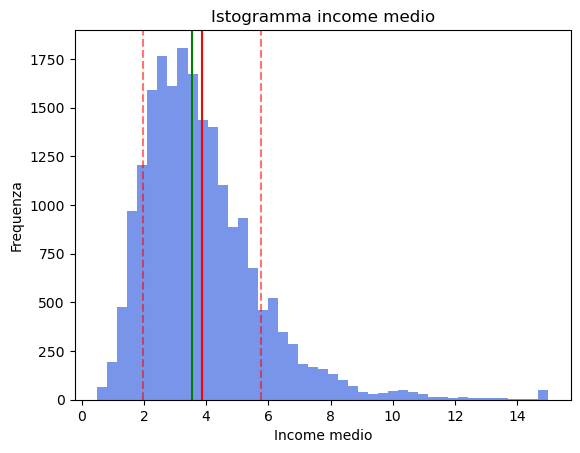

In [43]:
plt.figure()

data = df["MedInc"]

plt.hist(data, bins=45, color = "royalblue", alpha = 0.7)

plt.axvline(df["MedInc"].mean(), color ="r")
plt.axvline(df["MedInc"].median(), color ="g")
plt.axvline(df["MedInc"].mean() + df["MedInc"].std(), color ="r", linestyle = "--", alpha = 0.55)
plt.axvline(df["MedInc"].mean() - df["MedInc"].std(), color ="r", linestyle = "--", alpha = 0.55)


plt.title('Istogramma income medio')

plt.xlabel('Income medio')

plt.ylabel('Frequenza')

plt.show()

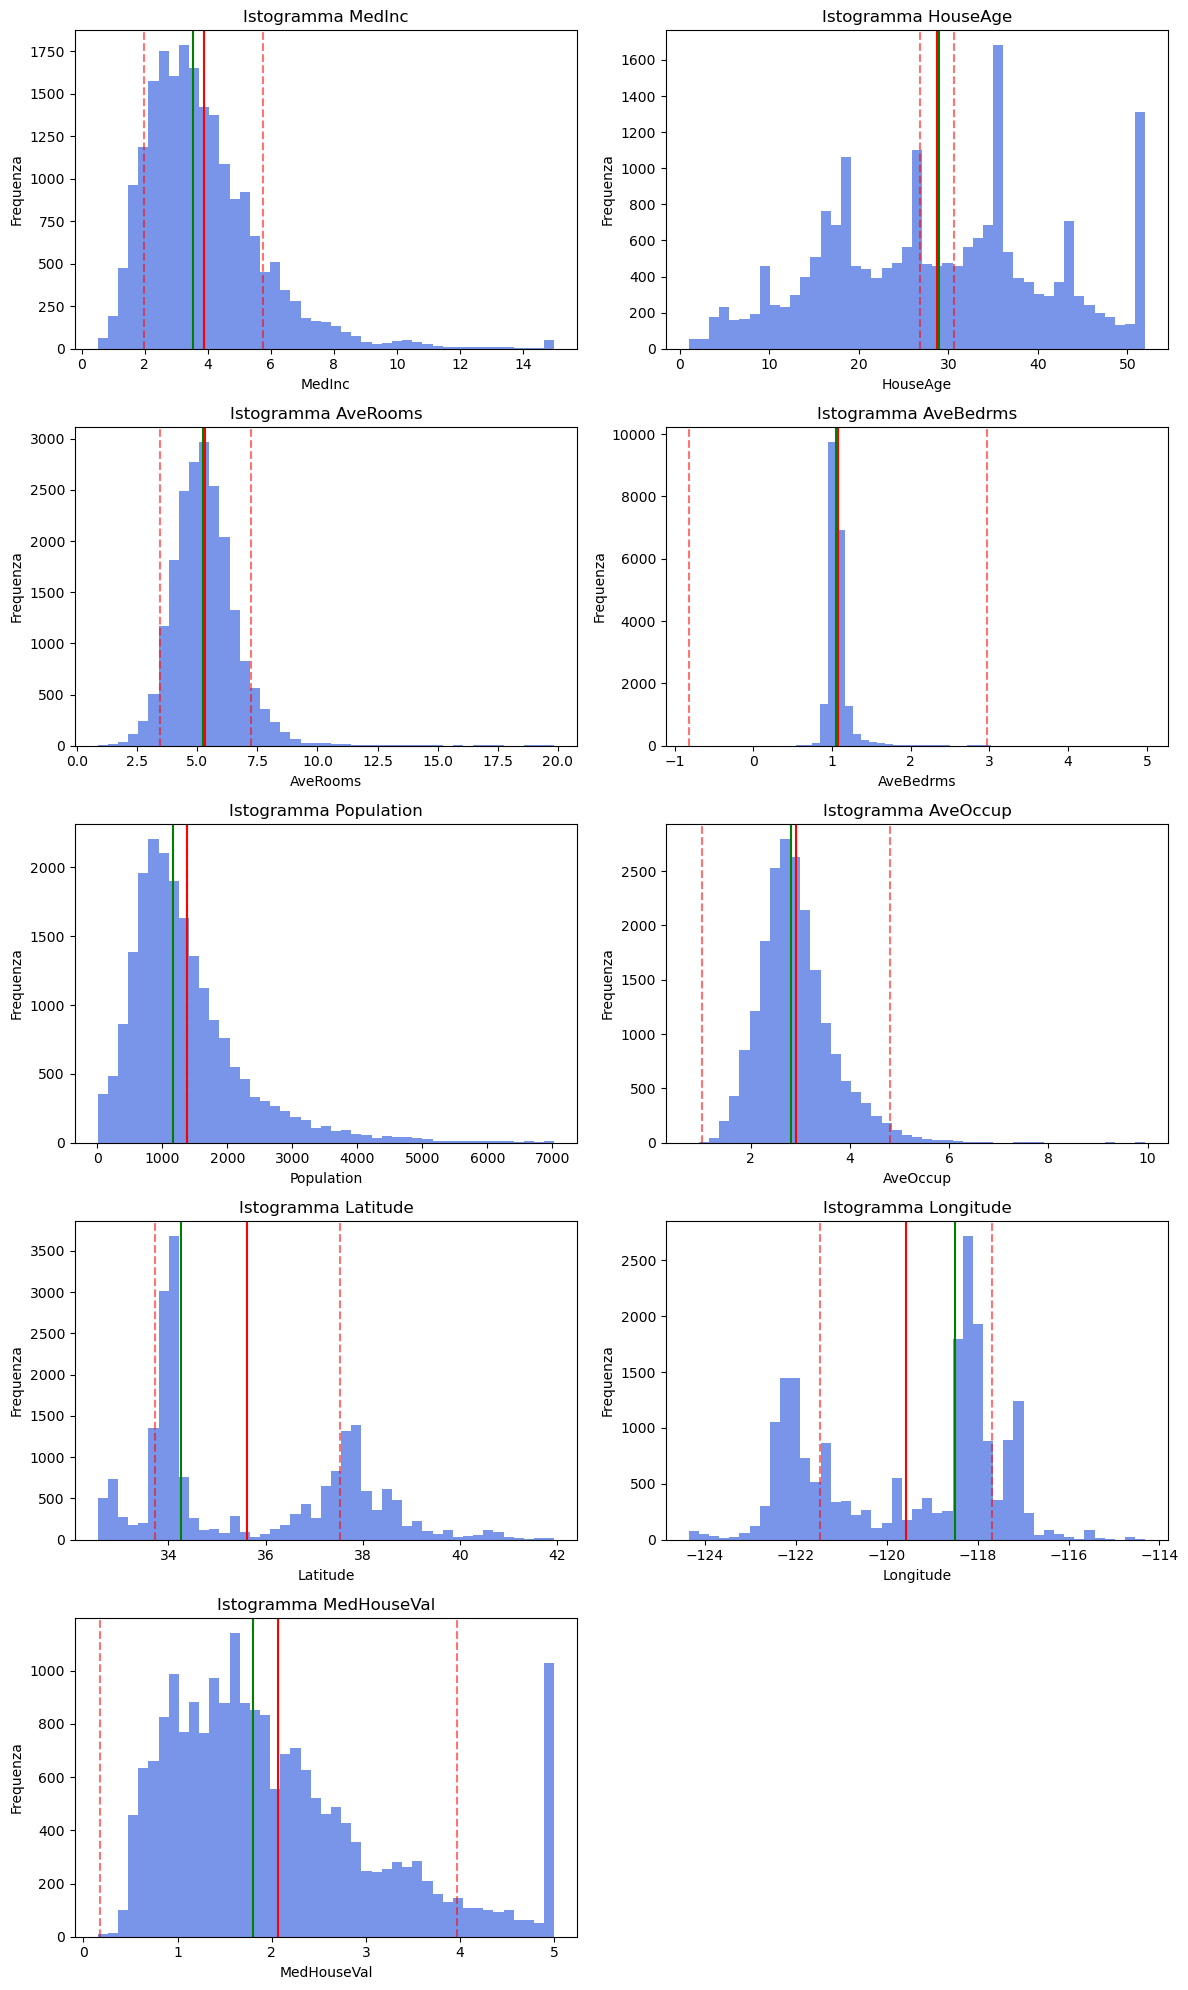

In [39]:
plt.figure(figsize=(12, 20))

for i in range(9):
    plt.subplot(5, 2, i +1)
    
    data = df[df.columns.values[i]]

    plt.hist(data, bins=45, color = "royalblue", alpha = 0.7)
    
    plt.axvline(data.mean(), color ="r")
    plt.axvline(data.median(), color ="g")
    plt.axvline(data.mean() + df["MedInc"].std(), color ="r", linestyle = "--", alpha = 0.55)
    plt.axvline(data.mean() - df["MedInc"].std(), color ="r", linestyle = "--", alpha = 0.55)
    
    
    plt.title(f'Istogramma {df.columns.values[i]}')
    
    plt.xlabel(df.columns.values[i])
    
    plt.ylabel('Frequenza')
    
    
plt.tight_layout()
plt.show()

In [45]:
df.dtypes

MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object

In [48]:
## Calcolo della matrice di covarianza
corr_matrix = df.corr()
print(corr_matrix)

               MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc       1.000000 -0.117495  0.589288  -0.124927   -0.012771 -0.067095   
HouseAge    -0.117495  1.000000 -0.219228  -0.124618   -0.302199 -0.004173   
AveRooms     0.589288 -0.219228  1.000000   0.482601   -0.087408 -0.050206   
AveBedrms   -0.124927 -0.124618  0.482601   1.000000   -0.066766 -0.096762   
Population  -0.012771 -0.302199 -0.087408  -0.066766    1.000000  0.193731   
AveOccup    -0.067095 -0.004173 -0.050206  -0.096762    0.193731  1.000000   
Latitude    -0.079848  0.011453  0.116672   0.063585   -0.117027 -0.162725   
Longitude   -0.015356 -0.106140 -0.051711   0.031098    0.108049  0.171092   
MedHouseVal  0.689754  0.106500  0.277506  -0.089786   -0.034472 -0.268345   

             Latitude  Longitude  MedHouseVal  
MedInc      -0.079848  -0.015356     0.689754  
HouseAge     0.011453  -0.106140     0.106500  
AveRooms     0.116672  -0.051711     0.277506  
AveBedrms    0.063585   0.0

Plottiamo longitude vs latituede.
Forma della California!

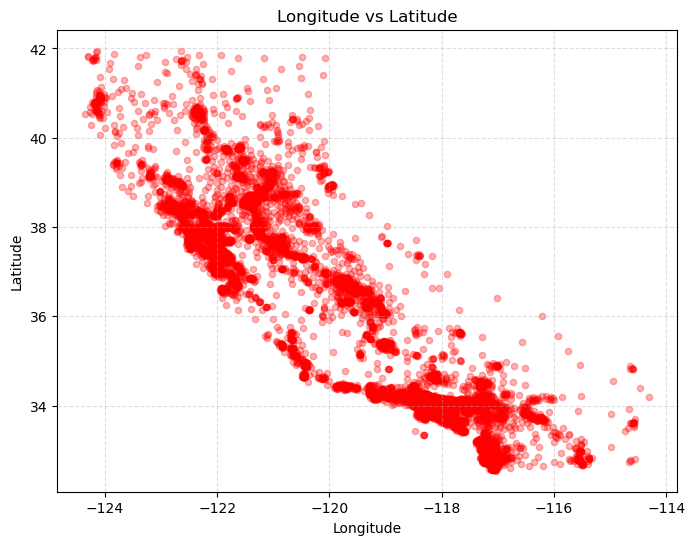

In [61]:
x = df["Longitude"]
y = df["Latitude"]

plt.figure(figsize=(8, 6))

plt.scatter(x, y, s=20, alpha=0.3, color = "r")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Longitude vs Latitude")
plt.grid(True, linestyle="--", alpha=0.4)

plt.show()

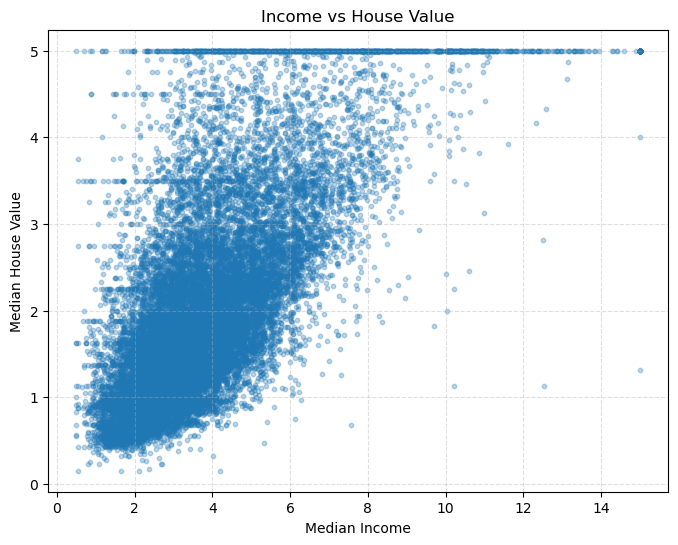

In [58]:
x = df["MedInc"]
y = df["MedHouseVal"]

plt.figure(figsize=(8, 6))

plt.scatter(x, y, s=10, alpha=0.3)
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.title("Income vs House Value")
plt.grid(True, linestyle="--", alpha=0.4)

plt.show()

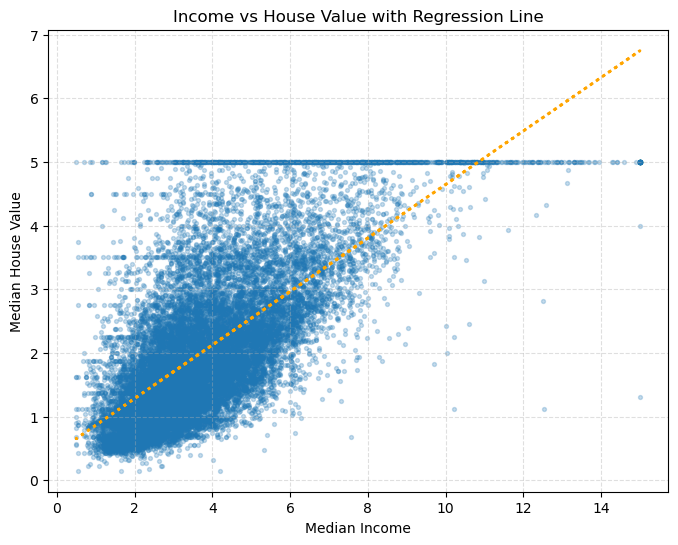

In [69]:
import numpy as np

x = df["MedInc"]
y = df["MedHouseVal"]

plt.figure(figsize=(8, 6))

# Scatter
plt.scatter(x, y, s=8, alpha=0.25)

# Regression line
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, linewidth=2, color='orange', label='Regression Line', linestyle =':')

plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.title("Income vs House Value with Regression Line")
plt.grid(True, linestyle="--", alpha=0.4)

plt.show()
